In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

import seaborn as sns

import numpy as np

import os
sns.set(style="darkgrid")

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
production_log = pd.read_csv('/content/Data/product_log_data.csv', infer_datetime_format= True)
production_log = production_log.drop("Unnamed: 0",axis=1)
production_log

,timestamp,product_id
0,2021-05-17_08-12-48,P3.2.500
1,2021-05-17_08-12-51,P3.2.501
2,2021-05-17_08-12-54,P3.2.502
3,2021-05-17_08-12-57,P3.2.503
4,2021-05-17_08-13-00,P3.2.504
...,...,...
1651,2021-05-17_09-35-21,P3.2.2151
1652,2021-05-17_09-35-24,P3.2.2152
1653,2021-05-17_09-35-27,P3.2.2153
1654,2021-05-17_09-35-30,P3.2.2154


In [ ]:
quality_log = pd.read_csv('/content/Data/quality_log_data.csv')
quality_log = quality_log.drop("Unnamed: 0",axis=1)
quality_log

,machine_id,product_id,quality
0,Printer F0815,P3.2.500,OK
1,Printer F0815,P3.2.501,OK
2,Printer F0815,P3.2.502,OK
3,Printer F0815,P3.2.503,OK
4,Printer F0815,P3.2.504,OK
...,...,...,...
1651,Printer F0815,P3.2.2151,nOK
1652,Printer F0815,P3.2.2152,nOK
1653,Printer F0815,P3.2.2153,nOK
1654,Printer F0815,P3.2.2154,nOK


## Merge Two DataFrames

In [ ]:
production_quality_log = pd.merge(production_log, quality_log,  how='left')
production_quality_log

,timestamp,product_id,machine_id,quality
0,2021-05-17_08-12-48,P3.2.500,Printer F0815,OK
1,2021-05-17_08-12-51,P3.2.501,Printer F0815,OK
2,2021-05-17_08-12-54,P3.2.502,Printer F0815,OK
3,2021-05-17_08-12-57,P3.2.503,Printer F0815,OK
4,2021-05-17_08-13-00,P3.2.504,Printer F0815,OK
...,...,...,...,...
1651,2021-05-17_09-35-21,P3.2.2151,Printer F0815,nOK
1652,2021-05-17_09-35-24,P3.2.2152,Printer F0815,nOK
1653,2021-05-17_09-35-27,P3.2.2153,Printer F0815,nOK
1654,2021-05-17_09-35-30,P3.2.2154,Printer F0815,nOK


In [ ]:
production_quality_log.machine_id.unique()

array(['Printer F0815'], dtype=object)

In [ ]:
production_quality_log = production_quality_log.drop("machine_id",axis=1)
production_quality_log

,timestamp,product_id,quality
0,2021-05-17_08-12-48,P3.2.500,OK
1,2021-05-17_08-12-51,P3.2.501,OK
2,2021-05-17_08-12-54,P3.2.502,OK
3,2021-05-17_08-12-57,P3.2.503,OK
4,2021-05-17_08-13-00,P3.2.504,OK
...,...,...,...
1651,2021-05-17_09-35-21,P3.2.2151,nOK
1652,2021-05-17_09-35-24,P3.2.2152,nOK
1653,2021-05-17_09-35-27,P3.2.2153,nOK
1654,2021-05-17_09-35-30,P3.2.2154,nOK


In [ ]:
production_quality_log.dtypes

timestamp     object
product_id    object
quality       object
dtype: object

In [ ]:
production_quality_log['timestamp'] = production_quality_log['timestamp'].str.replace('_', ' ')
production_quality_log

,timestamp,product_id,quality
0,2021-05-17 08-12-48,P3.2.500,OK
1,2021-05-17 08-12-51,P3.2.501,OK
2,2021-05-17 08-12-54,P3.2.502,OK
3,2021-05-17 08-12-57,P3.2.503,OK
4,2021-05-17 08-13-00,P3.2.504,OK
...,...,...,...
1651,2021-05-17 09-35-21,P3.2.2151,nOK
1652,2021-05-17 09-35-24,P3.2.2152,nOK
1653,2021-05-17 09-35-27,P3.2.2153,nOK
1654,2021-05-17 09-35-30,P3.2.2154,nOK


In [ ]:
production_quality_log.dtypes

timestamp     object
product_id    object
quality       object
dtype: object

In [ ]:
production_quality_log[production_quality_log['quality']=='nOK']

,timestamp,product_id,quality
1501,2021-05-17 09-27-51,P3.2.2001,nOK
1503,2021-05-17 09-27-57,P3.2.2003,nOK
1508,2021-05-17 09-28-12,P3.2.2008,nOK
1509,2021-05-17 09-28-15,P3.2.2009,nOK
1511,2021-05-17 09-28-21,P3.2.2011,nOK
...,...,...,...
1651,2021-05-17 09-35-21,P3.2.2151,nOK
1652,2021-05-17 09-35-24,P3.2.2152,nOK
1653,2021-05-17 09-35-27,P3.2.2153,nOK
1654,2021-05-17 09-35-30,P3.2.2154,nOK


## Import Sensor Data

In [ ]:
from glob import glob
filenames = glob('/content/Data/sensor_data/2021-05-17_*')
list_of_files_with_data = [pd.read_csv(f, delim_whitespace=True, header=None,names=['sensor 1','sensor 2']) for f in filenames] #Read all files
print(len(list_of_files_with_data))

1656


In [ ]:
list_of_files_with_data

[       sensor 1  sensor 2
 0        -0.310    -0.154
 1        -0.220    -0.139
 2        -0.183    -0.244
 3        -0.249    -0.042
 4        -0.203    -0.144
 ...         ...       ...
 20475    -0.078    -0.171
 20476    -0.146    -0.178
 20477    -0.251    -0.137
 20478    -0.029    -0.181
 20479     0.056    -0.010
 
 [20480 rows x 2 columns],        sensor 1  sensor 2
 0        -0.229    -0.112
 1        -0.071    -0.022
 2        -0.066    -0.093
 3        -0.232    -0.178
 4        -0.085    -0.103
 ...         ...       ...
 20475    -0.120    -0.146
 20476    -0.229    -0.227
 20477    -0.171    -0.288
 20478    -0.037    -0.195
 20479    -0.168    -0.146
 
 [20480 rows x 2 columns],        sensor 1  sensor 2
 0        -0.173    -0.061
 1        -0.178    -0.073
 2        -0.144    -0.137
 3        -0.254    -0.171
 4        -0.208    -0.305
 ...         ...       ...
 20475    -0.186    -0.110
 20476    -0.090    -0.183
 20477    -0.017    -0.144
 20478     0.007    -0.049

In [ ]:
production_quality_log['sensor data df'] = list_of_files_with_data
production_quality_log

,timestamp,product_id,quality,sensor data df
0,2021-05-17 08-12-48,P3.2.500,OK,sensor 1 sensor 2 0 -0.310 -...
1,2021-05-17 08-12-51,P3.2.501,OK,sensor 1 sensor 2 0 -0.229 -...
2,2021-05-17 08-12-54,P3.2.502,OK,sensor 1 sensor 2 0 -0.173 -...
3,2021-05-17 08-12-57,P3.2.503,OK,sensor 1 sensor 2 0 -0.237 -...
4,2021-05-17 08-13-00,P3.2.504,OK,sensor 1 sensor 2 0 -0.164 -...
...,...,...,...,...
1651,2021-05-17 09-35-21,P3.2.2151,nOK,sensor 1 sensor 2 0 -0.107 -...
1652,2021-05-17 09-35-24,P3.2.2152,nOK,sensor 1 sensor 2 0 -0.264 -...
1653,2021-05-17 09-35-27,P3.2.2153,nOK,sensor 1 sensor 2 0 -0.037 -...
1654,2021-05-17 09-35-30,P3.2.2154,nOK,sensor 1 sensor 2 0 -0.044 -...


In [ ]:
production_quality_log.drop(['product_id'], axis = 1,inplace=True)

In [ ]:
prod_quality={'OK': 1,'nOK': 0}
production_quality_log.quality = [prod_quality[item] for item in production_quality_log.quality]

In [ ]:
production_quality_log

,timestamp,quality,sensor data df
0,2021-05-17 08-12-48,1,sensor 1 sensor 2 0 -0.310 -...
1,2021-05-17 08-12-51,1,sensor 1 sensor 2 0 -0.229 -...
2,2021-05-17 08-12-54,1,sensor 1 sensor 2 0 -0.173 -...
3,2021-05-17 08-12-57,1,sensor 1 sensor 2 0 -0.237 -...
4,2021-05-17 08-13-00,1,sensor 1 sensor 2 0 -0.164 -...
...,...,...,...
1651,2021-05-17 09-35-21,0,sensor 1 sensor 2 0 -0.107 -...
1652,2021-05-17 09-35-24,0,sensor 1 sensor 2 0 -0.264 -...
1653,2021-05-17 09-35-27,0,sensor 1 sensor 2 0 -0.037 -...
1654,2021-05-17 09-35-30,0,sensor 1 sensor 2 0 -0.044 -...


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



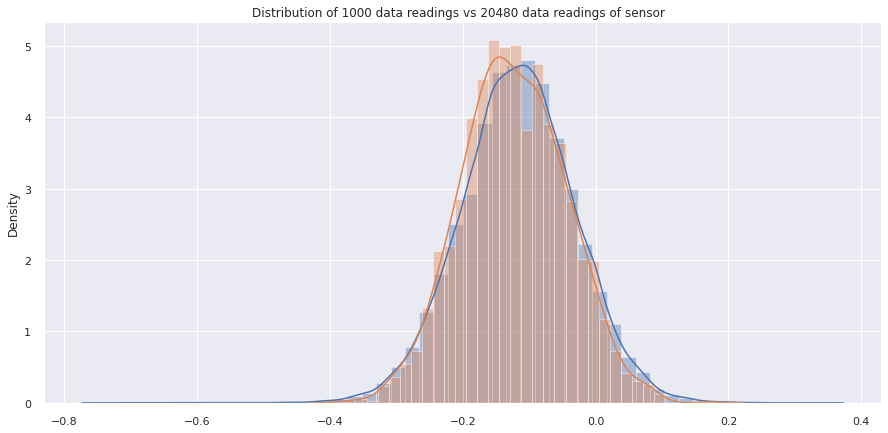

In [ ]:
import seaborn as sns
x=(production_quality_log['sensor data df'][0][:1000])
sns.distplot(production_quality_log['sensor data df'][0])
sns.distplot(x)
plt.title("Distribution of 1000 data readings vs 20480 data readings of sensor  ")
plt.show() #overlapping distribution , so 1000 data points were considered


## Reducing Sensor Datapoints to 1000

In [ ]:
production_quality_log['sensor data df'] = production_quality_log['sensor data df'].apply(lambda x:x[:1000])

In [ ]:
print(production_quality_log.shape)
print(production_quality_log['sensor data df'].apply(lambda x:x.shape))

(1656, 3)
0       (1000, 2)
1       (1000, 2)
2       (1000, 2)
3       (1000, 2)
4       (1000, 2)
          ...    
1651    (1000, 2)
1652    (1000, 2)
1653    (1000, 2)
1654    (1000, 2)
1655    (1000, 2)
Name: sensor data df, Length: 1656, dtype: object


So, we see that we have 1656 timestamps and for each timestamp we have 1000 recorded sensor data points

Parsing the Timestamp object to Datetime Type

In [ ]:
#import dateutil
#production_quality_log['timestamp'] = production_quality_log['timestamp'].apply(lambda x:dateutil.parser.parse(x))

In [ ]:
#check if NA values are present
print(production_quality_log['sensor data df'][::].isna().sum())
print(production_quality_log.isna().sum())

0
timestamp         0
quality           0
sensor data df    0
dtype: int64


### Variation of Sensor Readings with Time

In [ ]:
# For the steps of plotting time series plots we have to calculate the average of the sensor data for each timestamp

# Calculating the average of the sensor readings for each timestamp
avg_sensor_1,avg_sensor_2 = [],[]
for i in range(production_quality_log.shape[0]):
    avg_sensor_1.append(np.average(production_quality_log['sensor data df'][i]['sensor 1']))
    avg_sensor_2.append(np.average(production_quality_log['sensor data df'][i]['sensor 2']))
    

In [ ]:
sample_df = pd.DataFrame({'Time':production_quality_log['timestamp'],'Sensor1_Avg':avg_sensor_1,'Sensor2_Avg':avg_sensor_2})

sample_df['sensor1_mov_avg'] = sample_df.Sensor1_Avg.rolling(30).mean() #30 step window moving average for Sensor 1 values
sample_df['sensor2_mov_avg'] = sample_df.Sensor2_Avg.rolling(30).mean() #30 step window moving average for Sensor 2 values
fig_1 = px.line(sample_df, x='Time',y=['Sensor1_Avg','Sensor2_Avg','sensor1_mov_avg','sensor2_mov_avg'],template='plotly_dark')
fig_1.update_layout(
    font_family="Courier New",
    font_color="white",
    title_font_family="Times New Roman",
    title_font_color="White",
    legend_title_font_color="White"
)
fig_1.update_xaxes(title_font_family="Bold",title='TimeStamp')
fig_1.update_yaxes(title_font_family="Bold",title='Sensor Readings')
fig_1.update_layout(title_text='Sensor Readings vs Time', title_x=0.5)
fig_1.show()


In [ ]:
sample_df['quality'] = production_quality_log['quality']
fig_2 = px.line(sample_df, x='Time',y=['quality'],template='plotly_dark')
fig_2.update_layout(
    font_family="Courier New",
    font_color="white",
    title_font_family="Times New Roman",
    title_font_color="White",
    legend_title_font_color="White"
)
fig_2.update_xaxes(title_font_family="Bold",title='TimeStamp')
fig_2.update_yaxes(title_font_family="Bold",title='Sensor Readings')
fig_2.update_layout(title_text='Quality of Production Over Time', title_x=0.5)
fig_2.show()


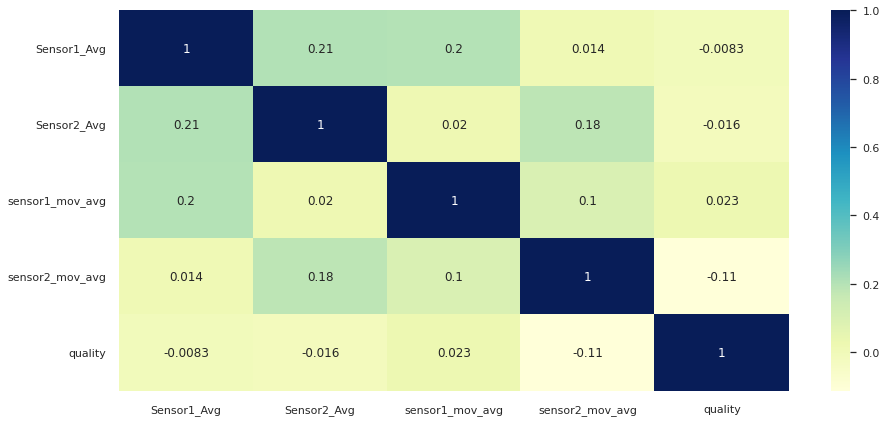

In [ ]:
#correlation between quality,sensor avg and moving avg
import seaborn as sns

sns.heatmap(sample_df.corr(), cmap="YlGnBu", annot=True)


As we see from the above correlation plot,sensor 2 has a higher impact on the quality of the product

In [ ]:
sample_df.dropna(inplace=True)

### Using KNN for classification

In [ ]:
#reshaping the original dataset for KNN,logistic and Random forest classifier
df_final_time,df_final_quality,sensor1,sensor2 = [],[],[],[]
for x in range(production_quality_log.shape[0]):
    for y in range(production_quality_log['sensor data df'][0].shape[0]):
        df_final_time.append(production_quality_log['timestamp'][x])
        df_final_quality.append(production_quality_log['quality'][x])
        sensor1.append(production_quality_log['sensor data df'][x]['sensor 1'][y])
        sensor2.append(production_quality_log['sensor data df'][x]['sensor 2'][y])

In [ ]:
df_final = pd.DataFrame(columns=['timestamp','quality','sensor1','sensor2'])
df_final['timestamp']=df_final_time
df_final['quality']=df_final_quality
df_final['sensor1']=sensor1
df_final['sensor2']=sensor2


In [ ]:
print(df_final.shape)
print(df_final.isna().sum())

(1656000, 4)
timestamp    0
quality      0
sensor1      0
sensor2      0
dtype: int64


In [ ]:
df_final.head()

,timestamp,quality,sensor1,sensor2
0,2021-05-17 08-12-48,1,-0.310,-0.154
1,2021-05-17 08-12-48,1,-0.220,-0.139
2,2021-05-17 08-12-48,1,-0.183,-0.244
3,2021-05-17 08-12-48,1,-0.249,-0.042
4,2021-05-17 08-12-48,1,-0.203,-0.144


##### statistical features of columns

In [ ]:
#statistical features of the existing columns
print("Sensor 1 Min value-",min(df_final.sensor1))
print("Sensor 1 Max value-",max(df_final.sensor1))
print("Sensor 2 Min value-",min(df_final.sensor2))
print("Sensor 2 Max value-",max(df_final.sensor2))

Sensor 1 Min value- -0.8759999999999999
Sensor 1 Max value- 0.581
Sensor 2 Min value- -0.7759999999999999
Sensor 2 Max value- 0.459


Defining a column called accelerate which will have the values of 0,1,2,3,4 based on whether sensor 1 and sensor2 is accelerating/decelerating. 

In [ ]:
conditions = [
    (df_final['sensor1'] < 0), #assign value of 1
    (df_final['sensor1'] > 0), #assign value of 2
    (df_final['sensor2'] < 0), #assign value of 3
    (df_final['sensor2'] > 0), #assign value of 4
    (df_final['sensor1'] == 0),#assign value of 0
    (df_final['sensor2'] == 0),#assign value of 0
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,4,0,0]

# create a new column and use np.select to assign values to it using our lists as arguments
df_final['acclerate'] = np.select(conditions, values)

# display updated DataFrame
df_final.head()

,timestamp,quality,sensor1,sensor2,acclerate
0,2021-05-17 08-12-48,1,-0.310,-0.154,1
1,2021-05-17 08-12-48,1,-0.220,-0.139,1
2,2021-05-17 08-12-48,1,-0.183,-0.244,1
3,2021-05-17 08-12-48,1,-0.249,-0.042,1
4,2021-05-17 08-12-48,1,-0.203,-0.144,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



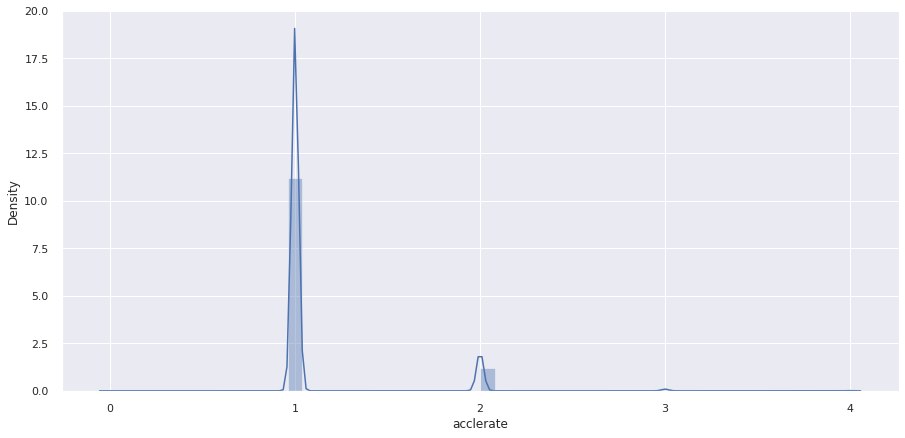

In [ ]:
sns.distplot(df_final['acclerate'])

So we see that the value of 1 and 2 has noticable distribution which means most of the noticable sensor data is from deceleration of sensor 1 and few from acceleration of sensor 1

Getting the count of positive,negative and zero acceleration of sensors.

In [ ]:
print("sensor1 acceleration:-",df_final['acclerate'].value_counts()[1])
print("sensor1 deceleration:-",df_final['acclerate'].value_counts()[2])
print("sensor2 deceleration:-",df_final['acclerate'].value_counts()[3])
print("sensor2 acceleration:-",df_final['acclerate'].value_counts()[4])
print("sensor1/sensor2 zero acceleration:-",df_final['acclerate'].value_counts()[0])

sensor1 acceleration:- 1486438
sensor1 deceleration:- 161849
sensor2 deceleration:- 6983
sensor2 acceleration:- 696
sensor1/sensor2 zero acceleration:- 34


using one hot encoding for adding categorical columns

In [ ]:
one_hot_encoded_data = pd.get_dummies(df_final, columns = ['acclerate'])
df_final_encoded = one_hot_encoded_data
df_final_encoded.head()

,timestamp,quality,sensor1,sensor2,acclerate_0,acclerate_1,acclerate_2,acclerate_3,acclerate_4
0,2021-05-17 08-12-48,1,-0.310,-0.154,0,1,0,0,0
1,2021-05-17 08-12-48,1,-0.220,-0.139,0,1,0,0,0
2,2021-05-17 08-12-48,1,-0.183,-0.244,0,1,0,0,0
3,2021-05-17 08-12-48,1,-0.249,-0.042,0,1,0,0,0
4,2021-05-17 08-12-48,1,-0.203,-0.144,0,1,0,0,0


plotting correlation of the columns now and looking for multicollinearity

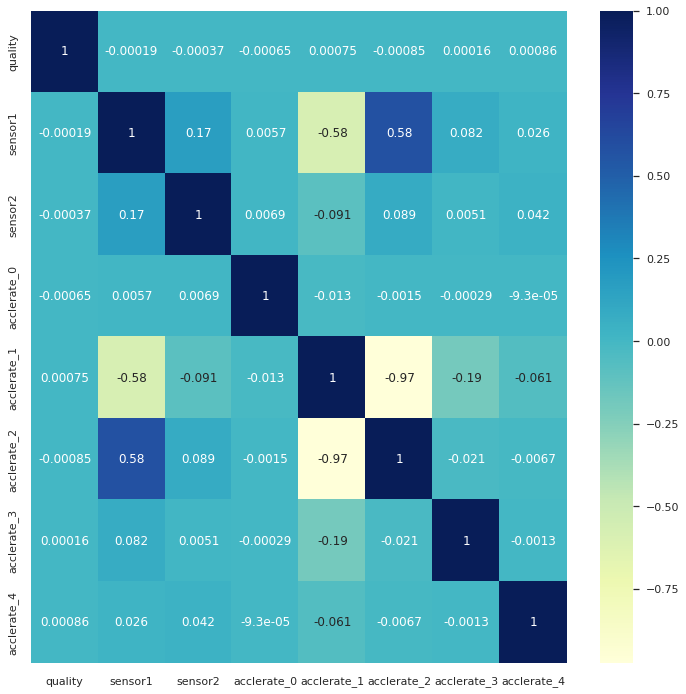

In [ ]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(df_final_encoded.corr(), cmap="YlGnBu", annot=True)

plt.show()

We see that sensor1,acclerate_1 and acclerate_2 are highly correlated. Let's also check the VIF(Variance Inflation Factor)of the parameters.  

In [ ]:
df_final_encoded.drop(['timestamp'],axis=1,inplace=True)
df_final_encoded['acclerate_0'] = df_final_encoded['acclerate_0'].astype('int64')
df_final_encoded['acclerate_1'] = df_final_encoded['acclerate_1'].astype('int64')
df_final_encoded['acclerate_2'] = df_final_encoded['acclerate_2'].astype('int64')
df_final_encoded['acclerate_3'] = df_final_encoded['acclerate_3'].astype('int64')
df_final_encoded['acclerate_4'] = df_final_encoded['acclerate_4'].astype('int64')

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
X = df_final_encoded.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,quality,17.869759
1,sensor1,3.992325
2,sensor2,3.442073
3,acclerate_0,1.000323
4,acclerate_1,20.572439
5,acclerate_2,2.867788
6,acclerate_3,1.080418


We see that the value of acclerate_1 has highest VIF value.Ideal VIF value should be between 1-5. So , dropping the value of acclerate_1.

In [ ]:
df_final_encoded.drop(['acclerate_1'],axis=1,inplace=True)

In [ ]:
calc_vif(df_final_encoded)

,variables,VIF
0,quality,4.712385
1,sensor1,3.564253
2,sensor2,3.185566
3,acclerate_0,1.000085
4,acclerate_2,1.550407
5,acclerate_3,1.015206
6,acclerate_4,1.002430


In [ ]:
df_final_encoded.head()

,quality,sensor1,sensor2,acclerate_0,acclerate_2,acclerate_3,acclerate_4
0,1,-0.310,-0.154,0,0,0,0
1,1,-0.220,-0.139,0,0,0,0
2,1,-0.183,-0.244,0,0,0,0
3,1,-0.249,-0.042,0,0,0,0
4,1,-0.203,-0.144,0,0,0,0


Taking df_final_encoded as the final dataset for Logistic Regression

##Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final_encoded.drop(['quality'],axis=1)
y = df_final_encoded['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)


## Handling class imbalance

In [ ]:
print("y train counts\n",y_train.value_counts())
print("y test counts\n",y_test.value_counts())

y train counts
 1    469140
0     27660
Name: quality, dtype: int64
y test counts
 1    1094860
0      64340
Name: quality, dtype: int64


So we see that there is a clear class imbalance of the Ok and Not ok Machines. So, we apply methods like SMOTEENN(Synthetic Minority Oversampling Technique) to resample and undersample the non-fitting class of the data in the majority class of samples.

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
smenn = SMOTEENN(sampling_strategy=1.0,random_state=42)
X_train,y_train = smenn.fit_resample(X_train,y_train)

In [ ]:
from collections import Counter
count = Counter(y_train)
print("after re-sampling:",count)

after re-sampling: Counter({1: 388387, 0: 226759})


#### Let's check the distribution of the plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



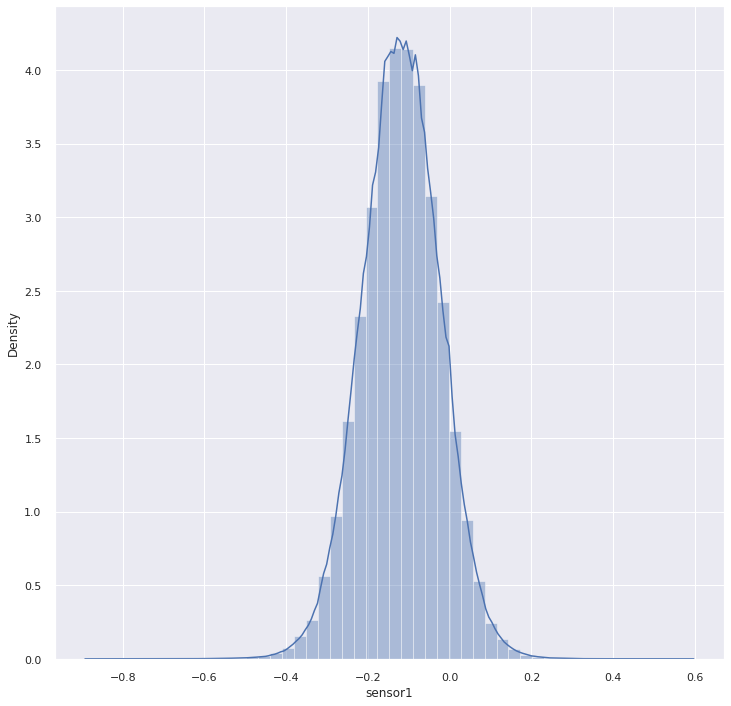

In [ ]:
import seaborn as sns
sns.distplot(df_final_encoded['sensor1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



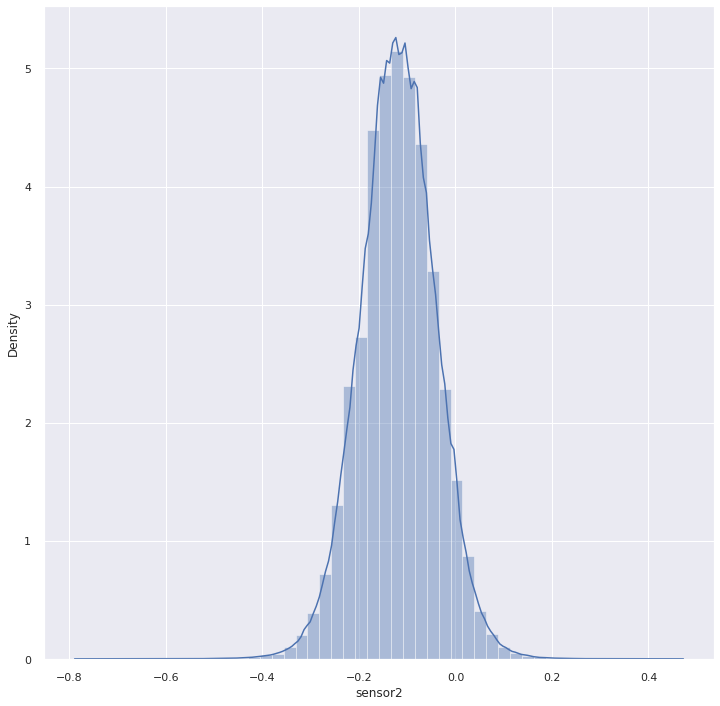

In [ ]:
sns.distplot(df_final_encoded['sensor2'])
plt.show()

## checking for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



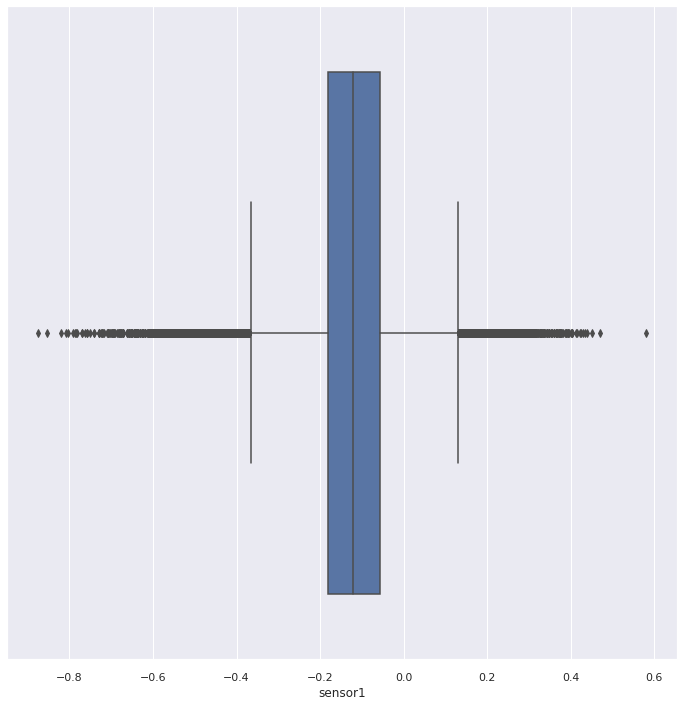

In [ ]:
sns.boxplot(df_final_encoded['sensor1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



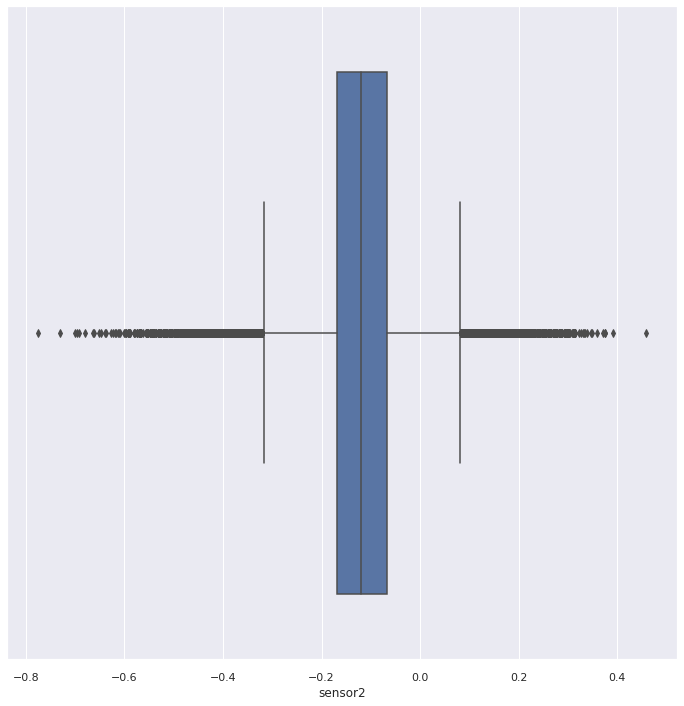

In [ ]:
sns.boxplot(df_final_encoded['sensor2'])

#### Since, there are subsequent outliers , so we retain values in the IQR range only.

In [ ]:
df_final_encoded = df_final_encoded[(df_final_encoded.sensor1 > df_final_encoded.sensor1.quantile(0.25)) & (df_final_encoded.sensor1<df_final_encoded.sensor1.quantile(0.75))]
df_final_encoded = df_final_encoded[(df_final_encoded.sensor2 > df_final_encoded.sensor2.quantile(0.25)) & (df_final_encoded.sensor2<df_final_encoded.sensor2.quantile(0.75))]


In [ ]:
#shape of df_final_encoded after removing outliers
df_final_encoded.shape

(395154, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



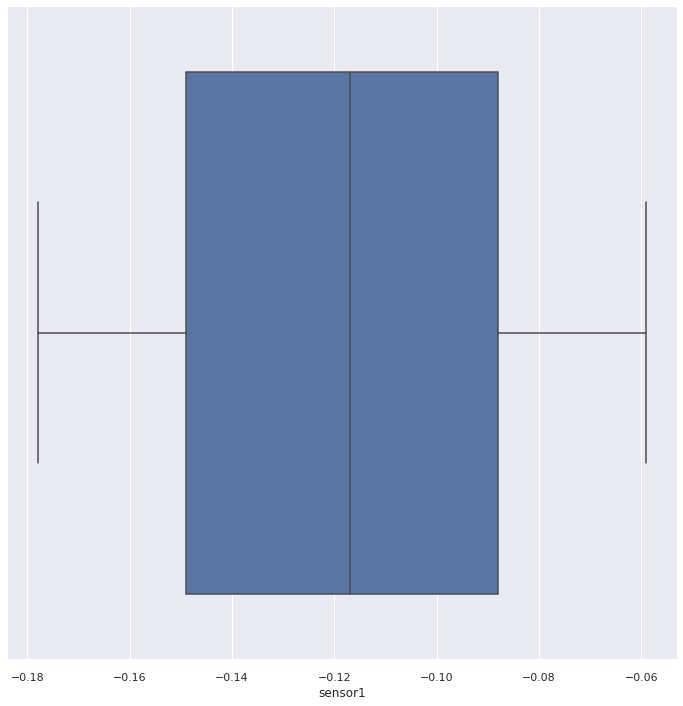

In [ ]:
sns.boxplot(df_final_encoded['sensor1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



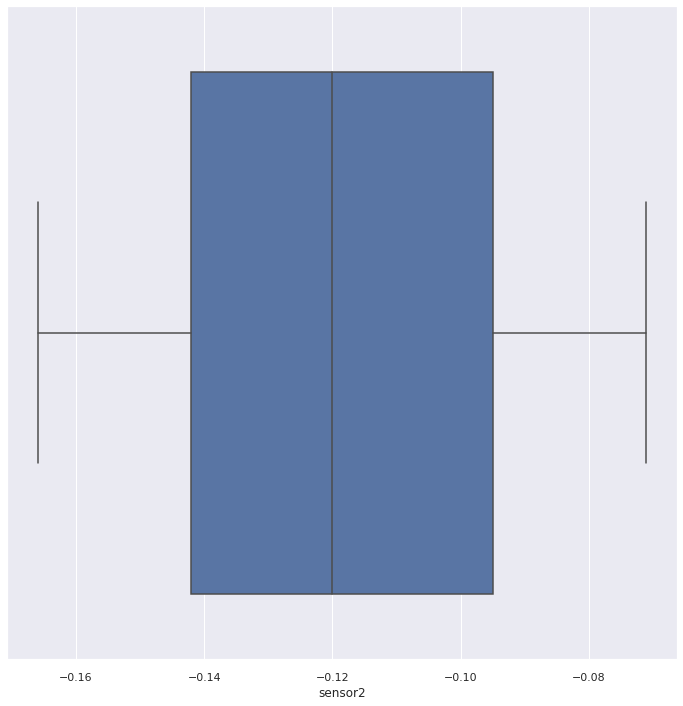

In [ ]:
sns.boxplot(df_final_encoded['sensor2'])
plt.show()

After outlier treatment, let's calculate the ratio of quality 1 and quality 0 readings in the dataset.

In [ ]:
y_train.value_counts()/y_train.shape[0]

1    0.631374
0    0.368626
Name: quality, dtype: float64

We see that 62.8 % of the data is Ok quality and 37.16% of remaining data is of nOK quality.

So, we see that that now the outliers have been removed from the data.

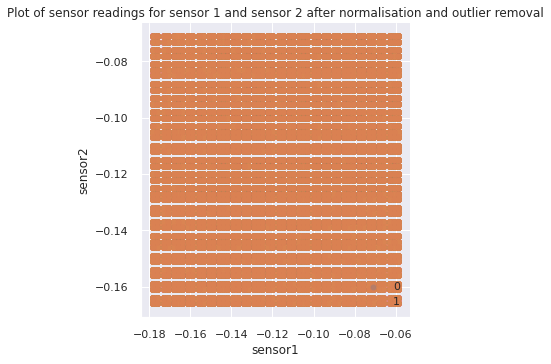

In [ ]:
import matplotlib.pyplot as plt
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="sensor1", y="sensor2", data=df_final_encoded, fit_reg=False, hue='quality', legend=False,scatter_kws={"alpha":0.25})
plt.legend(loc='lower right')
plt.title("Plot of sensor readings for sensor 1 and sensor 2 after normalisation and outlier removal")
plt.show()


As we see that after undersampling the data, most of the classes of data of the data is overlapping.

Let's check the distribution of the data now

## Logistic Regression based Model for predicting Quality(without weighted average)

In [ ]:
y_train_df = pd.DataFrame(y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns

Now we will use Logistic Regression using SAGA(Stochastic Average Gradient Descent solver) that includes both L1 and L2 Regularisation.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga',penalty = 'elasticnet',l1_ratio=1).fit(X_train_scaled,np.array(y_train_df).ravel())

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,predictions))
print("Accuracy score -",accuracy_score(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00     64340
           1       0.94      1.00      0.97   1094860

    accuracy                           0.94   1159200
   macro avg       0.47      0.50      0.49   1159200
weighted avg       0.89      0.94      0.92   1159200

Accuracy score - 0.944496204278813


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy of Logistic Regression based model :- 94% , F1- score :- 97%

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# predict probabilities
pred_prob1 = model.predict_proba(X_test)


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.5004103734438738


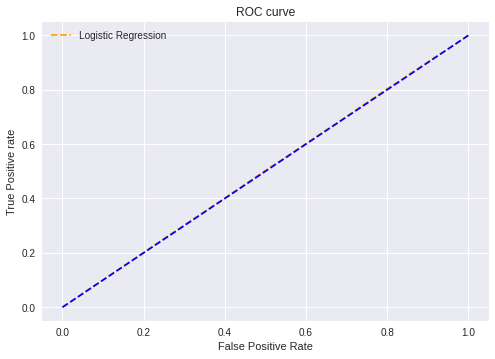

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

If we see the AUC-ROC curve, the area under it is 50% which gives a sense that the model is behaving randomly.

## Logistic Regression based Model for predicting Quality(with weighted average)

In [ ]:
model2 = LogisticRegression(class_weight='balanced').fit(X_train_scaled,np.array(y_train_df).ravel())
predictions_2 = model2.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions_2))

              precision    recall  f1-score   support

           0       0.06      0.98      0.11     64399
           1       0.94      0.02      0.04   1094801

    accuracy                           0.07   1159200
   macro avg       0.50      0.50      0.07   1159200
weighted avg       0.89      0.07      0.04   1159200



In [ ]:
pred_prob2 = model2.predict_proba(X_test)
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score2)

0.5016380606948739


So,we see that even after using weighted average, the accuracy of the model decreases.

## Random forest based model for predicting Quality

number of estimators(50) i.e , max. number of decision trees = 50

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50,oob_score = True)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,np.array(y_train).ravel())

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8292330917874396


Accuracy of the Random forest based Model = 82.9%

In [ ]:
df_final.set_index('timestamp',inplace=True)

In [ ]:
sample_df.set_index('Time',inplace=True)
#sample_df = sample_df.drop(['sensor1_mov_avg','sensor2_mov_avg'],axis=1)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
sample_df_1 = sample_df.drop(['sensor2_mov_avg','Sensor1_Avg','Sensor2_Avg','quality'],axis=1)

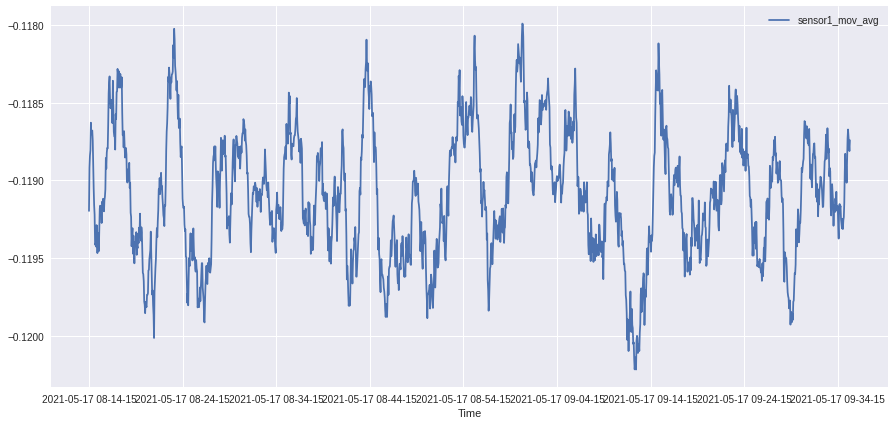

In [ ]:
#sample_df_1 = sample_df_1[:100] # doing time series forecast using last 100 data points 
sample_df_1.plot() 

In [ ]:
sample_df_1.dropna(inplace=True)

In [ ]:
#checking if the given data is stationary
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(sample_df_1['sensor1_mov_avg'])
def adfuller_test(readings):
    result=adfuller(readings)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(sample_df_1['sensor1_mov_avg'])


ADF Test Statistic : -5.034830977525831
p-value : 1.892738769982773e-05
#Lags Used : 0
Number of Observations : 1626
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


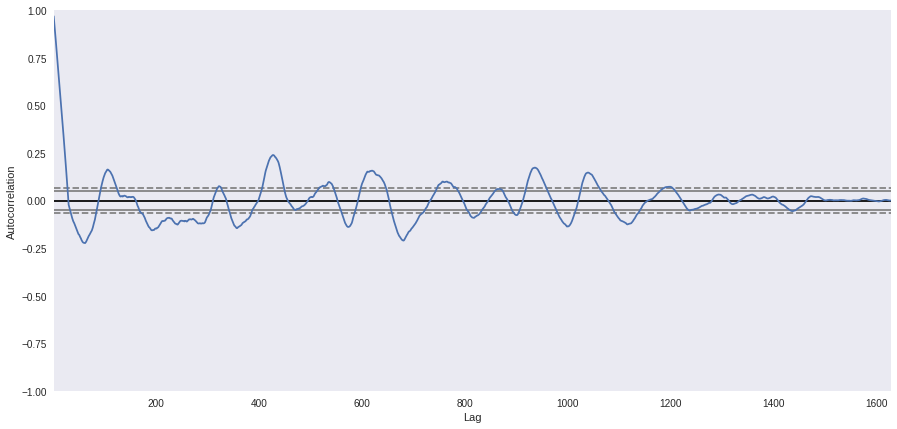

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sample_df_1['sensor1_mov_avg'])
plt.show()

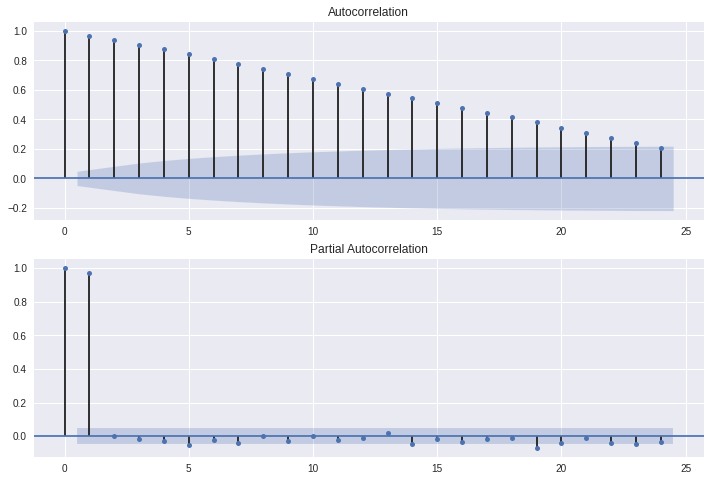

In [ ]:
#plotting partial autocorrelation and correlation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sample_df_1['sensor1_mov_avg'].dropna(),lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sample_df_1['sensor1_mov_avg'].dropna(),lags=24,ax=ax2)

In [ ]:
#p=2, d=0 , q=1
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(sample_df_1['sensor1_mov_avg'],order=(2,0,8))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning:

invalid value encountered in sqrt



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        sensor1_mov_avg   No. Observations:                 1627
Model:                     ARMA(2, 8)   Log Likelihood               12677.406
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sat, 29 Jan 2022   AIC                         -25330.813
Time:                        18:41:07   BIC                         -25266.079
Sample:                             0   HQIC                        -25306.795
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1191   6.51e-05  -1828.118      0.000      -0.119      -0.119
ar.L1.sensor1_mov_avg     1.5463        nan        nan        nan         nan         nan
ar.L2.sensor1_mov_avg    -0.5662        nan        nan        nan         nan         nan
ma.L1.sensor1_mov_avg    -0.5776        nan        nan        nan         nan         nan
ma.L2.sensor1_mov_avg     0.0169      0.028      0.595      0.552      -0.039       0.072
ma.L3.sensor1_mov_avg     0.0260      0.027      0.959      0.338      -0.027       0.079
ma.L4.sensor1_mov_avg     0.0343      0.023      1.465      0.143      -0.012       0.080
ma.L5.sensor1_mov_avg    -0.0040      0.018     -0.221      0.825      -0.039       0.031
ma.L6.sensor1_mov_avg     0.0360      0.027      1.312      0.190      -0.018       0.090
ma.L7.sensor1_mov_avg    -0.0266      0.022     -1.235      0.217      -0.069       0.016
ma.L8.sensor1_mov_avg     0.0236      0.024      0.992      0.322      -0.023       0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0516           +0.0000j            1.0516            0.0000
AR.2            1.6797           +0.0000j            1.6797            0.0000
MA.1           -1.3821           -0.7252j            1.5608           -0.4231
MA.2           -1.3821           +0.7252j            1.5608            0.4231
MA.3           -0.3498           -1.6559j            1.6925           -0.2831
MA.4           -0.3498           +1.6559j            1.6925            0.2831
MA.5            1.3121           -0.5362j            1.4175           -0.0617
MA.6            1.3121           +0.5362j            1.4175            0.0617
MA.7            0.9831           -1.4341j            1.7387           -0.1544
MA.8            0.9831           +1.4341j            1.7387            0.1544
-----------------------------------------------------------------------------
"""

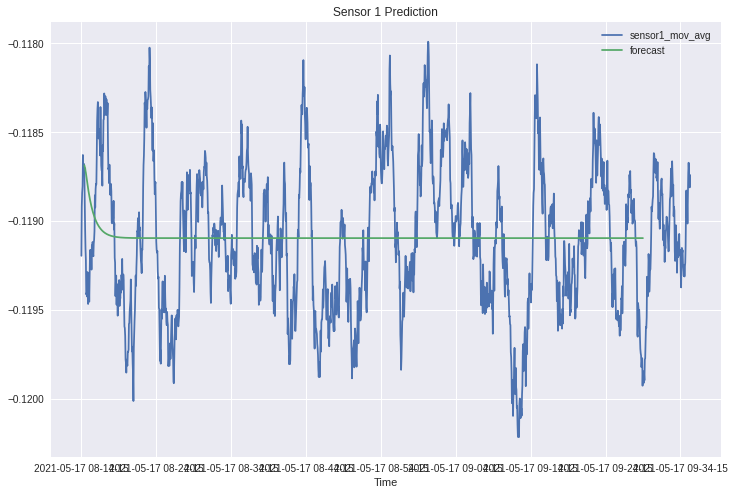

In [ ]:
sample_df_1['forecast']=model_fit.predict(start=8,end=1500,dynamic=True)
sample_df_1[['sensor1_mov_avg','forecast']].plot(figsize=(12,8),title='Sensor 1 Prediction')

In [ ]:
sample_df_2 = sample_df.drop(['sensor1_mov_avg','Sensor1_Avg','Sensor2_Avg','quality'],axis=1)

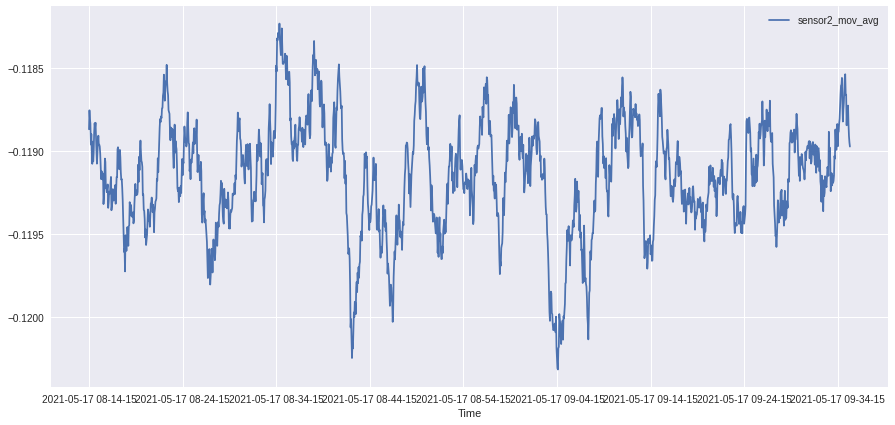

In [ ]:
sample_df_2.plot() 

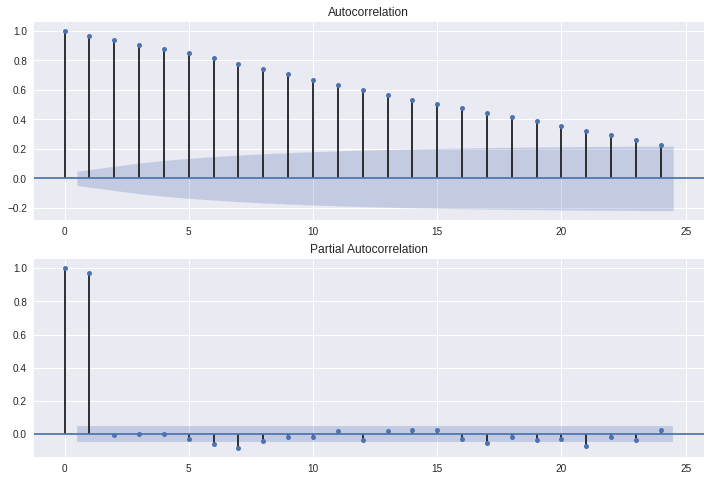

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sample_df_2['sensor2_mov_avg'].dropna(),lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sample_df_2['sensor2_mov_avg'].dropna(),lags=24,ax=ax2)

In [ ]:
sample_df_2.dropna(inplace=True)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(sample_df_2['sensor2_mov_avg'],order=(2,0,8))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        sensor2_mov_avg   No. Observations:                 1627
Model:                     ARMA(2, 8)   Log Likelihood               12973.990
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sat, 29 Jan 2022   AIC                         -25923.980
Time:                        18:41:52   BIC                         -25859.246
Sample:                             0   HQIC                        -25899.962
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1191   5.33e-05  -2233.916      0.000      -0.119      -0.119
ar.L1.sensor2_mov_avg     1.3525      0.580      2.333      0.020       0.216       2.489
ar.L2.sensor2_mov_avg    -0.3836      0.552     -0.695      0.487      -1.466       0.699
ma.L1.sensor2_mov_avg    -0.3920      0.578     -0.678      0.498      -1.525       0.741
ma.L2.sensor2_mov_avg     0.0050      0.028      0.177      0.859      -0.050       0.060
ma.L3.sensor2_mov_avg     0.0117      0.027      0.431      0.667      -0.041       0.065
ma.L4.sensor2_mov_avg     0.0460      0.028      1.653      0.099      -0.009       0.101
ma.L5.sensor2_mov_avg     0.0485      0.040      1.221      0.222      -0.029       0.126
ma.L6.sensor2_mov_avg     0.0729      0.048      1.524      0.128      -0.021       0.167
ma.L7.sensor2_mov_avg     0.0162      0.063      0.258      0.796      -0.107       0.139
ma.L8.sensor2_mov_avg     0.0047      0.043      0.109      0.913      -0.079       0.089
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0551           +0.0000j            1.0551            0.0000
AR.2            2.4710           +0.0000j            2.4710            0.0000
MA.1            1.1141           -0.6024j            1.2665           -0.0789
MA.2            1.1141           +0.6024j            1.2665            0.0789
MA.3            0.1748           -1.6763j            1.6854           -0.2335
MA.4            0.1748           +1.6763j            1.6854            0.2335
MA.5           -1.5959           -0.9860j            1.8759           -0.4119
MA.6           -1.5959           +0.9860j            1.8759            0.4119
MA.7           -1.4238           -3.3664j            3.6551           -0.3137
MA.8           -1.4238           +3.3664j            3.6551            0.3137
-----------------------------------------------------------------------------
"""

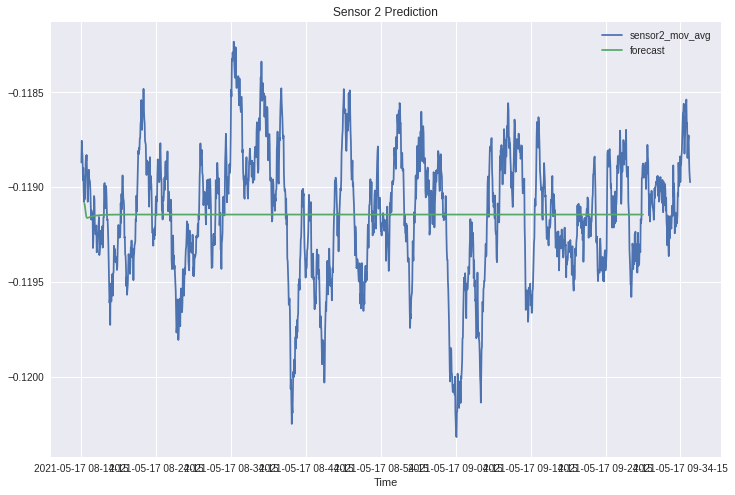

In [ ]:
sample_df_2['forecast']=model_fit.predict(start=8,end=1500,dynamic=True)
sample_df_2[['sensor2_mov_avg','forecast']].plot(figsize=(12,8),title='Sensor 2 Prediction')

As we see that even with the moving average method , auto-correlation for time series analysis for sensors 1 and 2 has been low. Hence, ARIMA based time series is an adequate model here